# Analyzing Amazon Sales data

### 1. Load and Explore the Dataset

In [75]:
# Importing Libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [76]:
# Loading the dataset

df = pd.read_csv('Amazon Sales data.csv')
df

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Sub-Saharan Africa,Mali,Clothes,Online,M,7/26/2011,512878119,9/3/2011,888,109.28,35.84,97040.64,31825.92,65214.72
96,Asia,Malaysia,Fruits,Offline,L,11/11/2011,810711038,12/28/2011,6267,9.33,6.92,58471.11,43367.64,15103.47
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,6/1/2016,728815257,6/29/2016,1485,154.06,90.93,228779.10,135031.05,93748.05
98,North America,Mexico,Personal Care,Offline,M,7/30/2015,559427106,8/8/2015,5767,81.73,56.67,471336.91,326815.89,144521.02


- **There are total 14 columns in the dataset**
  
  1. `Region:` The geographic region where the sales transaction took place.    

  2. `Country:` The specific country within the region where the sales transaction occurred.

  3. `Item Type:` The category of the item sold. 

  4. `Sales Channel:` Indicates whether the sales transaction was conducted online or offline. 

  5. `Order Priority:` The priority level assigned to the order, indicating its urgency. Examples include "H" (High), "C" (Critical), "L" (Low), "M"          (Medium).

  6. `Order Date:` The date when the order was placed. 

  7. `Order ID:` A unique identifier assigned to each sales order. 

  8. `Ship Date:` The date when the order was shipped.

  9. `Units Sold:` The quantity of units sold in the transaction.

  10. `Unit Price:` The selling price per unit of the item. 

  11. `Unit Cost:` The cost to the company per unit of the item.

  12. `Total Revenue:` The total revenue generated from the sale, calculated as: **(Units Sold * Unit Price)**.

  13. `Total Cost:` The total cost incurred for the sale, calculated as: **(Units Sold * Unit Cost)**.

  14. `Total Profit:` The total profit earned from the sale, calculated as: **(Total Revenue - Total Cost)**.

In [77]:
# Gives general overview of the data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


In [78]:
# Overview of the numerical columns in the dataset

df1 = df[['Units Sold', 'Unit Price',	'Unit Cost', 'Total Revenue', 'Total Cost',	'Total Profit']].describe()
df1

,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05
std,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05
min,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03
25%,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05
50%,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05
75%,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05
max,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06


- Count: The number of non-null entries for each column.
- Mean: The average value of each column.
- Standard Deviation (std): The standard deviation of each column.
- Minimum (min): The smallest value in each column.
- 25th Percentile (25%): The value below which 25% of the data falls.
- 50th Percentile (50%): The median value, or the value below which 50% of the data falls.
- 75th Percentile (75%): The value below which 75% of the data falls.
- Maximum (max): The largest value in each column.

In [79]:
# Calculating covariance matrix

cov_matrix = df1.cov()
print("Covariance matrix:\n")
cov_matrix

Covariance matrix:



,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
Units Sold,1.176252e+07,6.822218e+05,4.831336e+05,5.854148e+09,4.342042e+09,1.685807e+09
Unit Price,6.822218e+05,4.636504e+04,3.472059e+04,4.079996e+08,3.078771e+08,1.154150e+08
Unit Cost,4.831336e+05,3.472059e+04,2.692795e+04,3.171073e+08,2.403241e+08,8.944505e+07
Total Revenue,5.854148e+09,4.079996e+08,3.171073e+08,3.901103e+12,2.958429e+12,1.101949e+12
Total Cost,4.342042e+09,3.078771e+08,2.403241e+08,2.958429e+12,2.248365e+12,8.340074e+11
Total Profit,1.685807e+09,1.154150e+08,8.944505e+07,1.101949e+12,8.340074e+11,3.120302e+11


- As Covariance measures the **directional relationship** between two variables.
- 
  For example the high positive value(**8.944505e+07**) of covariance between `Unit Cost` and `Total Profit` indicates that
  if cost to the company per    unit of the item increases, **Total Profit** tends to increase as well.

In [80]:
# # Calculating correlation matrix

corr_matrix = df1.corr()
print("Correlation matrix:\n")
corr_matrix

Correlation matrix:



,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
Units Sold,1.000000,0.923805,0.858451,0.864211,0.844327,0.879953
Unit Price,0.923805,1.000000,0.982630,0.959336,0.953561,0.959552
Unit Cost,0.858451,0.982630,1.000000,0.978388,0.976702,0.975790
Total Revenue,0.864211,0.959336,0.978388,1.000000,0.998928,0.998779
Total Cost,0.844327,0.953561,0.976702,0.998928,1.000000,0.995722
Total Profit,0.879953,0.959552,0.975790,0.998779,0.995722,1.000000


- Correlation measures both the strength and direction of the linear relationship between two variables. 
- It is normalized, meaning it ranges from -1 to 1.
- The high value of correlation coefficient(**0.998779**) between `Total Revenue` and `Total Profit` indicates that these two variables are
  very closely related to each other. This means that if the revenue generated is high, then more profit will be generated and vice versa.

### 2. Data Cleaning and Transformation

In [81]:
# Checks for missing values

df.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

- The output shows that there are no missing values in the dataset.

In [82]:
# Checking for duplicates

if df.duplicated().sum() > 0:  
    print("Duplicates exist in the DataFrame.")
else:
    print("No duplicates found in the DataFrame.")

No duplicates found in the DataFrame.


- Since our dataset contains no duplicate values, so we are good to go.
- If the dataset contained any duplicate values we would have used
    `df.drop_duplicates(inplace=True)`       # To Drop duplicates if any

In [83]:
df.set_index('Order ID',inplace=True)

# Extracting useful information from date columns

# Convert date columns to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Ship Date'])

# Extract year, month, quarter, and day from 'Order Date'
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month
df['Quarter'] = df['Order Date'].dt.quarter
df['Day'] = df['Order Date'].dt.day

# Check the cleaned data
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Year,Month,Quarter,Day
Order ID,,,,,,,,,,,,,,,,,
669165933,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50,2010,5,2,28
963881480,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36,2012,8,3,22
341417157,Europe,Russia,Office Supplies,Offline,L,2014-05-02,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75,2014,5,2,2
514321792,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,2014-07-05,8102,9.33,6.92,75591.66,56065.84,19525.82,2014,6,2,20
115456712,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,2013-02-06,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2013,2,1,1


### 3. Exploratory Data Analysis

#### (i) Geographical Analysis:

In [84]:
# Let's see how many regions we have
unique_regions = df['Region'].unique()

# Get the number of unique regions
no_unique_regions = len(unique_regions)

print(f'There are {no_unique_regions} unique regions in the dataset.\n')
print(f'The unique regions are:\n\n {unique_regions}')

There are 7 unique regions in the dataset.

The unique regions are:

 ['Australia and Oceania' 'Central America and the Caribbean' 'Europe'
 'Sub-Saharan Africa' 'Asia' 'Middle East and North Africa'
 'North America']


In [85]:
# Sales per Region

# Group the data by Region and calculate the total revenue (sales) for each region
region_sales = df.groupby(['Region'])['Total Revenue'].sum().reset_index()

# Sort the states based on their total sales in descending order to identify top spenders
top_sales = region_sales.sort_values(by='Total Revenue', ascending=False)

# Print the states 
print(top_sales.head(7).reset_index(drop=True))

                              Region  Total Revenue
0                 Sub-Saharan Africa    39672031.43
1                             Europe    33368932.11
2                               Asia    21347091.02
3              Australia and Oceania    14094265.13
4       Middle East and North Africa    14052706.58
5  Central America and the Caribbean     9170385.49
6                      North America     5643356.55


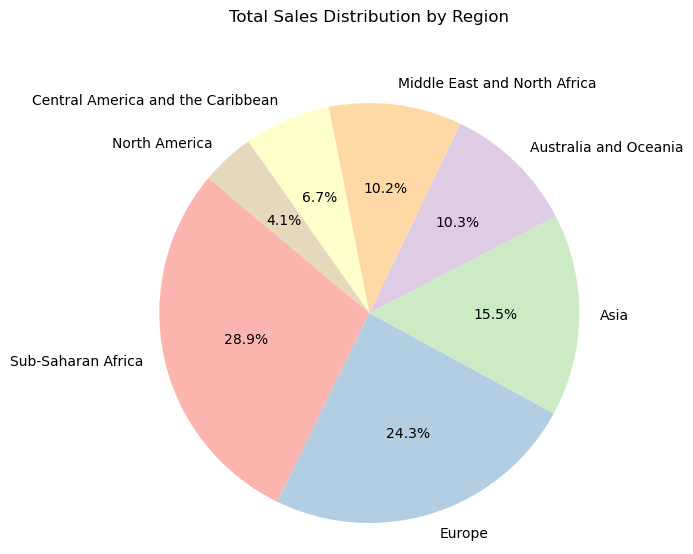

In [86]:
# Pie Chart for Sales per Region
plt.figure(figsize=(8, 6))
plt.pie(top_sales['Total Revenue'], labels=top_sales['Region'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Pastel1', len(top_sales)))
plt.title('Total Sales Distribution by Region\n\n\n')
plt.axis('equal')  
plt.show()


In [87]:
# Let's see how many regions we have
unique_countries = df['Country'].unique()

# Get the number of unique regions
no_unique_countries = len(unique_countries)

print(f'There are {no_unique_countries} unique countries in the dataset.\n')
print(f'The unique countries are:\n\n {unique_countries}')

There are 76 unique countries in the dataset.

The unique countries are:

 ['Tuvalu' 'Grenada' 'Russia' 'Sao Tome and Principe' 'Rwanda'
 'Solomon Islands' 'Angola' 'Burkina Faso' 'Republic of the Congo'
 'Senegal' 'Kyrgyzstan' 'Cape Verde' 'Bangladesh' 'Honduras' 'Mongolia'
 'Bulgaria' 'Sri Lanka' 'Cameroon' 'Turkmenistan' 'East Timor' 'Norway'
 'Portugal' 'New Zealand' 'Moldova ' 'France' 'Kiribati' 'Mali'
 'The Gambia' 'Switzerland' 'South Sudan' 'Australia' 'Myanmar' 'Djibouti'
 'Costa Rica' 'Syria' 'Brunei' 'Niger' 'Azerbaijan' 'Slovakia' 'Comoros'
 'Iceland' 'Macedonia' 'Mauritania' 'Albania' 'Lesotho' 'Saudi Arabia'
 'Sierra Leone' "Cote d'Ivoire" 'Fiji' 'Austria' 'United Kingdom'
 'San Marino' 'Libya' 'Haiti' 'Gabon' 'Belize' 'Lithuania' 'Madagascar'
 'Democratic Republic of the Congo' 'Pakistan' 'Mexico'
 'Federated States of Micronesia' 'Laos' 'Monaco' 'Samoa ' 'Spain'
 'Lebanon' 'Iran' 'Zambia' 'Kenya' 'Kuwait' 'Slovenia' 'Romania'
 'Nicaragua' 'Malaysia' 'Mozambique']


In [88]:
# Group the data by Country and calculate the total revenue (sales) for each country
country_sales = df.groupby(['Country'])['Total Revenue'].sum().reset_index()

# Sort the countries based on their total sales in descending order to identify top performers
top_country_sales = country_sales.sort_values(by='Total Revenue', ascending=False)

# Print the top countries
print(top_country_sales.head(10).reset_index(drop=True))

        Country  Total Revenue
0      Honduras     6336545.48
1       Myanmar     6161257.90
2      Djibouti     6052890.86
3  Turkmenistan     5822036.20
4        Mexico     5643356.55
5    The Gambia     5449517.95
6     Lithuania     5396577.27
7        Rwanda     5253769.42
8    Azerbaijan     4478800.21
9        Brunei     4368316.68


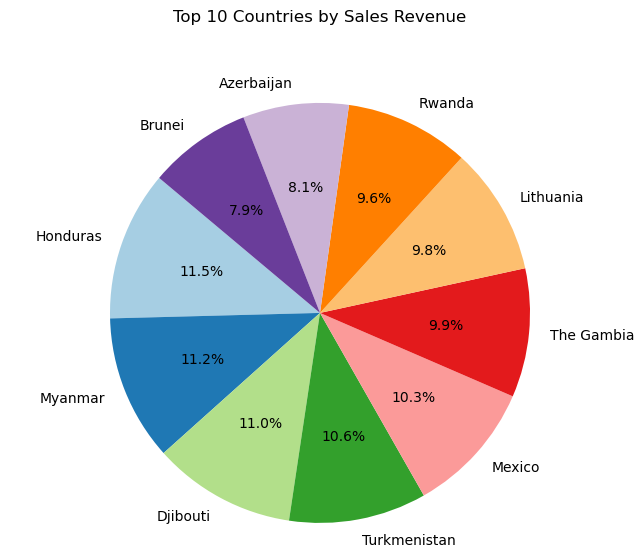

In [89]:
top_10_countries = top_country_sales.head(10)

# Plot the pie chart
plt.figure(figsize=(8, 6))
plt.pie(top_10_countries['Total Revenue'], labels=top_10_countries['Country'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette("Paired", 10))
plt.title('Top 10 Countries by Sales Revenue\n\n\n')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

#### (ii) Sales Trend Analysis:

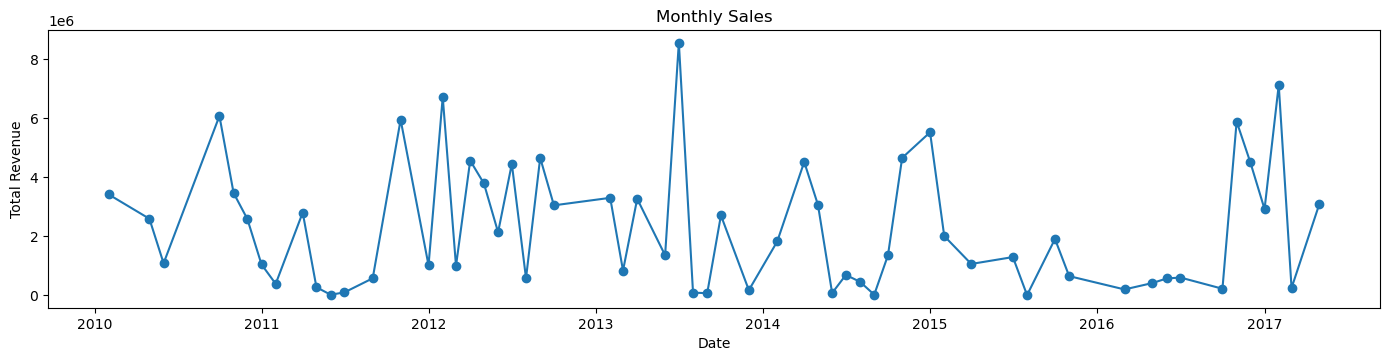

In [90]:
# Group by Year and Month to get monthly sales
monthly_sales = df.groupby(['Year', 'Month'])['Total Revenue'].sum().reset_index()
monthly_sales['Date'] = pd.to_datetime(monthly_sales[['Year', 'Month']].assign(day=1))

# Plotting
plt.figure(figsize=(14, 10))

# Monthly Sales
plt.subplot(3, 1, 1)
plt.plot(monthly_sales['Date'], monthly_sales['Total Revenue'], marker='o')
plt.title('Monthly Sales')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.tight_layout()
plt.show()


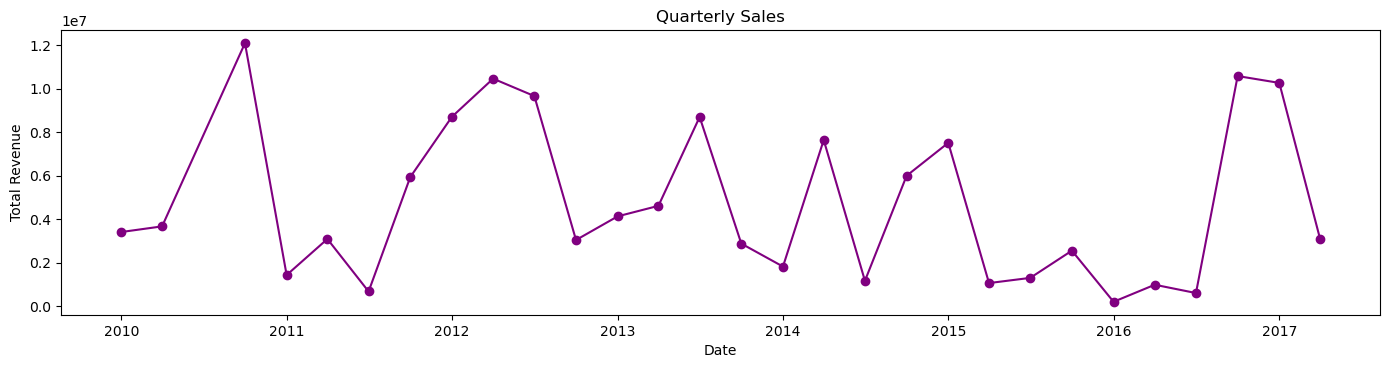

In [91]:
# Group by Year and Quarter to get quarterly sales
df['Quarter'] = df['Order Date'].dt.to_period('Q')
quarterly_sales = df.groupby('Quarter')['Total Revenue'].sum().reset_index()
quarterly_sales['Date'] = quarterly_sales['Quarter'].dt.to_timestamp()

# Plotting
plt.figure(figsize=(14, 10))

# Quarterly Sales
plt.subplot(3, 1, 2)
plt.plot(quarterly_sales['Date'], quarterly_sales['Total Revenue'], marker='o', color='purple')
plt.title('Quarterly Sales')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.tight_layout()
plt.show()


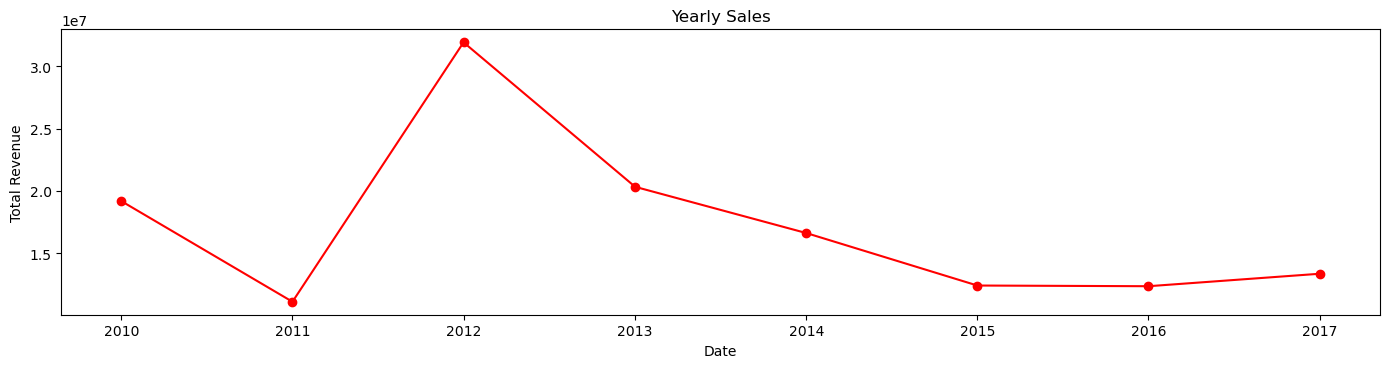

In [92]:
# Group by Year to get yearly sales
yearly_sales = df.groupby('Year')['Total Revenue'].sum().reset_index()
yearly_sales['Date'] = pd.to_datetime(yearly_sales['Year'].astype(str) + '-01-01')

# Plotting
plt.figure(figsize=(14, 10))

# Yearly Sales
plt.subplot(3, 1, 3)
plt.plot(yearly_sales['Date'], yearly_sales['Total Revenue'], marker='o', color='red')
plt.title('Yearly Sales')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.tight_layout()
plt.show()


#### (iii) Product Analysis:

In [93]:
# Counting the different types of items present in the dataset and displaying them 

product_type = df['Item Type'].unique()
no_product_type = df['Item Type'].nunique()
print(no_product_type)
print(product_type)

12
['Baby Food' 'Cereal' 'Office Supplies' 'Fruits' 'Household' 'Vegetables'
 'Personal Care' 'Clothes' 'Cosmetics' 'Beverages' 'Meat' 'Snacks']


In [94]:
# Group the data by product category versus the sales from each product category 
product_type = df.groupby(['Item Type'])['Total Revenue'].sum().reset_index()

# Sort the product category in their descending order and identify top product category
top_product_type = product_type.sort_values(by='Total Revenue', ascending=False) 

# Print the states 
print(top_product_type.reset_index(drop=True))

          Item Type  Total Revenue
0         Cosmetics    36601509.60
1   Office Supplies    30585380.07
2         Household    29889712.29
3         Baby Food    10350327.60
4           Clothes     7787292.80
5            Cereal     5322898.90
6              Meat     4503675.75
7     Personal Care     3980904.84
8        Vegetables     3089057.06
9         Beverages     2690794.60
10           Snacks     2080733.46
11           Fruits      466481.34


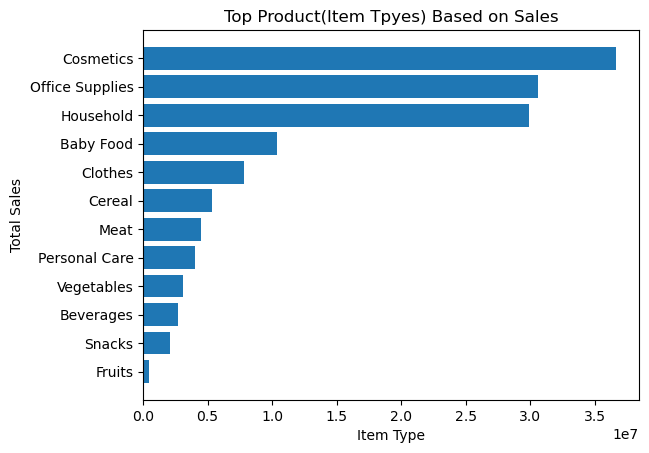

In [95]:
top_product_type = top_product_type.sort_values(by='Total Revenue', ascending=True)

# Ploting a bar graph
plt.barh(top_product_type['Item Type'], top_product_type['Total Revenue'])

# Labels
plt.title('Top Product(Item Tpyes) Based on Sales')
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)

plt.show()


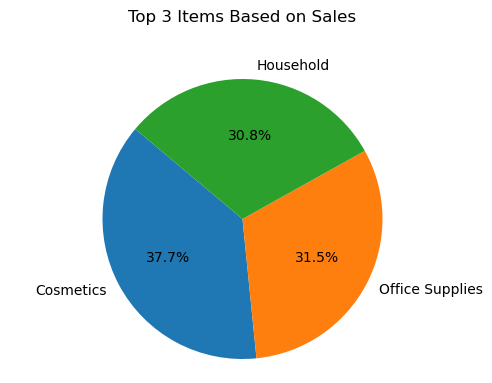

In [96]:
# Sort data by 'Total Revenue' in descending order to find top items
top_product_type = top_product_type.sort_values(by='Total Revenue', ascending=False)

# Select top 3 items
top_3_items = top_product_type.head(3)

# Plot pie chart
plt.figure(figsize=(6, 4))
plt.pie(top_3_items['Total Revenue'], labels=top_3_items['Item Type'], autopct='%1.1f%%', startangle=140)
plt.title('Top 3 Items Based on Sales\n\n')
plt.axis('equal')  
plt.show()

- The pie chart demonstrates that `Item Type` **Cosmetics** generates the most revenue **(37.7%)**, followed by **Office Supplies**, and **Household**.

In [97]:
# Group the data by product category versus the sales from each product category 
product_type = df.groupby(['Item Type'])['Total Profit'].sum().reset_index()

# Sort the product category in their descending order and identify top product category
top_product_type = product_type.sort_values(by='Total Profit', ascending=False) 

# Print the states 
print(top_product_type.reset_index(drop=True))

          Item Type  Total Profit
0         Cosmetics   14556048.66
1         Household    7412605.71
2   Office Supplies    5929583.75
3           Clothes    5233334.40
4         Baby Food    3886643.70
5            Cereal    2292443.43
6        Vegetables    1265819.63
7     Personal Care    1220622.48
8         Beverages     888047.28
9            Snacks     751944.18
10             Meat     610610.00
11           Fruits     120495.18


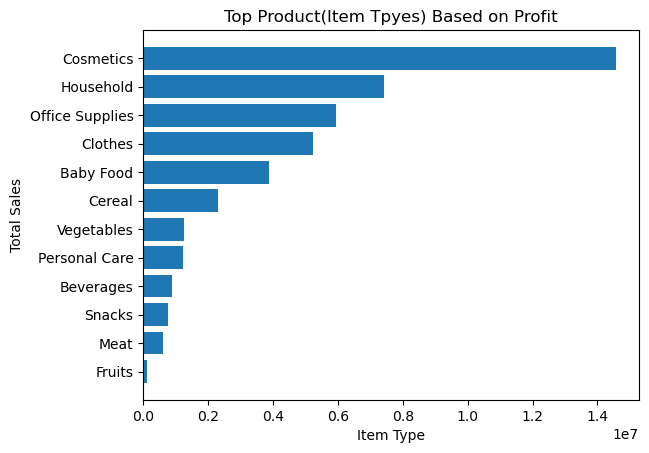

In [98]:
top_product_type = top_product_type.sort_values(by='Total Profit', ascending=True)

# Ploting a bar graph
plt.barh(top_product_type['Item Type'], top_product_type['Total Profit'])

# Labels
plt.title('Top Product(Item Tpyes) Based on Profit')
plt.xlabel('Item Type')
plt.ylabel('Total Sales')
plt.xticks(rotation=0)

plt.show()


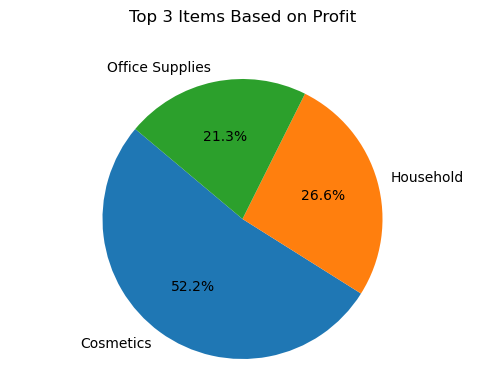

In [99]:
# Sort data by 'Total Revenue' in descending order to find top items
top_product_type = top_product_type.sort_values(by='Total Profit', ascending=False)

# Select top 3 items
top_3_items = top_product_type.head(3)

# Plot pie chart
plt.figure(figsize=(6, 4))
plt.pie(top_3_items['Total Profit'], labels=top_3_items['Item Type'], autopct='%1.1f%%', startangle=140)
plt.title('Top 3 Items Based on Profit\n\n')
plt.axis('equal')  
plt.show()

In [100]:
# Group the data by product category and sum the units sold
units_sold_by_product_type = df.groupby(['Item Type'])['Units Sold'].sum().reset_index()

# Sort the product categories by units sold in descending order to identify top product categories
units_sold_by_product_type = units_sold_by_product_type.sort_values(by='Units Sold', ascending=False)

# Print the product types with their respective units sold
print(units_sold_by_product_type.reset_index(drop=True))

          Item Type  Units Sold
0         Cosmetics       83718
1           Clothes       71260
2         Beverages       56708
3            Fruits       49998
4     Personal Care       48708
5   Office Supplies       46967
6         Household       44727
7         Baby Food       40545
8            Cereal       25877
9        Vegetables       20051
10           Snacks       13637
11             Meat       10675


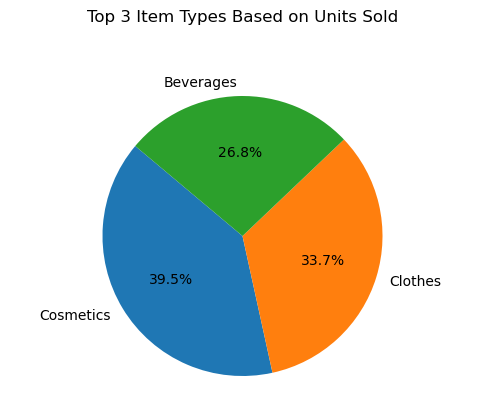

In [101]:
# Select the top 3 product types
top_3_units_sold = units_sold_by_product_type.head(3)

# Plotting the pie chart
plt.figure(figsize=(6, 4))
plt.pie(top_3_units_sold['Units Sold'], labels=top_3_units_sold['Item Type'], autopct='%1.1f%%', startangle=140)
plt.title('Top 3 Item Types Based on Units Sold\n\n\n')
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.
plt.show()

Text(0.5, 0, 'Units Sold')

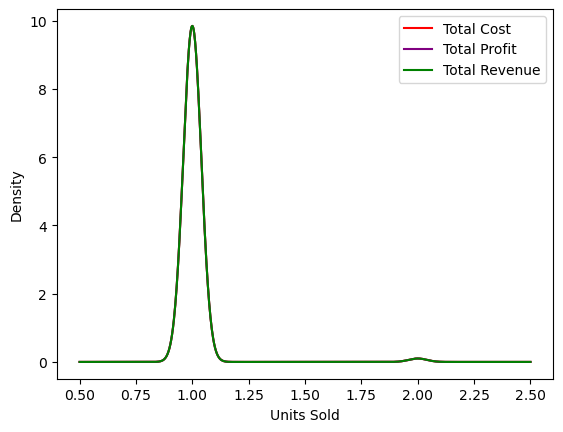

In [102]:
pd.pivot_table(df,values=['Total Revenue','Total Cost','Total Profit'],index='Units Sold',aggfunc='count').plot(kind='kde',color=['red','purple','green'],stacked=True)
plt.xlabel('Units Sold')

- The KDE graph shows that **Total Profit** and **Total Cost** have similar or no variations in data when grouped by Units Sold.

In [103]:
# Group by Region and Item Type, and sum the Units Sold for each group
sales_summary = df.groupby(['Region', 'Item Type'])['Units Sold'].sum().reset_index()

# For each region, find the item with the maximum units sold
most_sold_items = sales_summary.loc[sales_summary.groupby('Region')['Units Sold'].idxmax()]

# Print the result
print(most_sold_items)

                               Region      Item Type  Units Sold
0                                Asia        Clothes       14193
8               Australia and Oceania      Beverages       18768
19  Central America and the Caribbean      Household        8974
25                             Europe      Cosmetics       30100
32       Middle East and North Africa      Cosmetics       23615
36                      North America  Personal Care       12189
42                 Sub-Saharan Africa         Fruits       31167


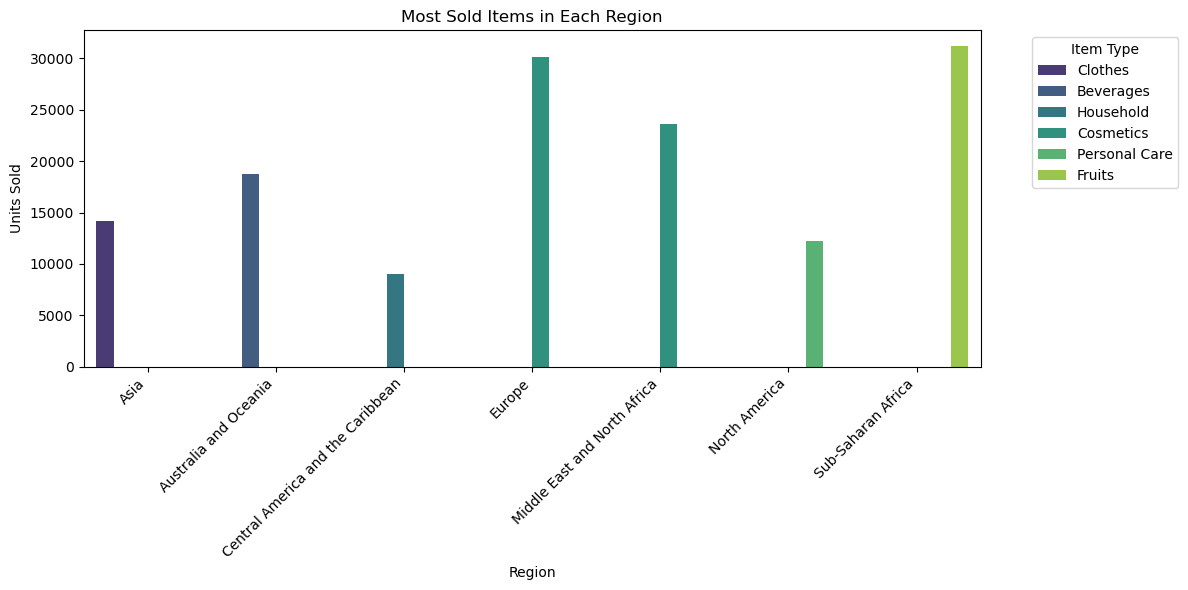

In [104]:
# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='Region', y='Units Sold', hue='Item Type', data=most_sold_items, palette='viridis')

plt.title('Most Sold Items in Each Region')
plt.xlabel('Region')
plt.ylabel('Units Sold')
plt.xticks(rotation=45, ha='right')  
plt.legend(title='Item Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()

- The bar chart shows that:
  
  In **Asia** the most sold product item is `Clothes`.

  In **Australia and Oceania** the most sold product item is `Beverages`.

  In **Central America and the Caribbean** the most sold product item is `Household`.

  In **Europe** and **Middle East and North Africa** the most sold product item is `Cosmetics`.

  In **North America** the most sold product item is `Personal Care`.

  In **Sub-Saharan Africa** the most sold product item is `Fruits`.


In [105]:
# Checking which item generates the most revenue in the specific region
# Aggregating total revenue by region and item typ
revenue_by_region_item = df.groupby(['Region', 'Item Type'])['Total Revenue'].sum().reset_index()

most_revenue_items = revenue_by_region_item.loc[revenue_by_region_item.groupby('Region')['Total Revenue'].idxmax()]
print(most_revenue_items)

                               Region        Item Type  Total Revenue
3                                Asia        Household     8072701.60
11              Australia and Oceania        Cosmetics     4220728.80
19  Central America and the Caribbean        Household     5997054.98
25                             Europe        Cosmetics    13159720.00
32       Middle East and North Africa        Cosmetics    10324478.00
35                      North America        Household     4647149.58
45                 Sub-Saharan Africa  Office Supplies    10582813.71


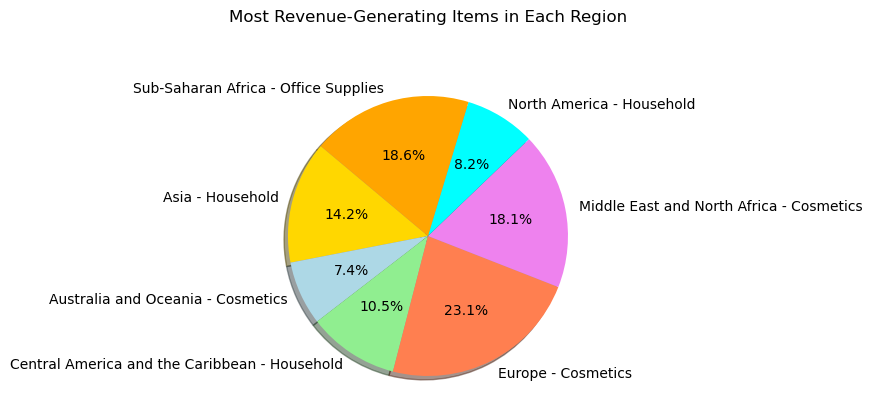

In [106]:
# Plotting the pie chart
plt.figure(figsize=(8, 4))
colors = ['gold', 'lightblue', 'lightgreen', 'coral', 'violet', 'cyan', 'orange']
plt.pie(most_revenue_items['Total Revenue'], 
        labels=most_revenue_items['Region'] + ' - ' + most_revenue_items['Item Type'],
        autopct='%1.1f%%',
        shadow=True,
        startangle=140,
        colors=colors)

plt.title('Most Revenue-Generating Items in Each Region\n\n\n')
plt.axis('equal') 
plt.show()

#### (iv) Sales Analysis:

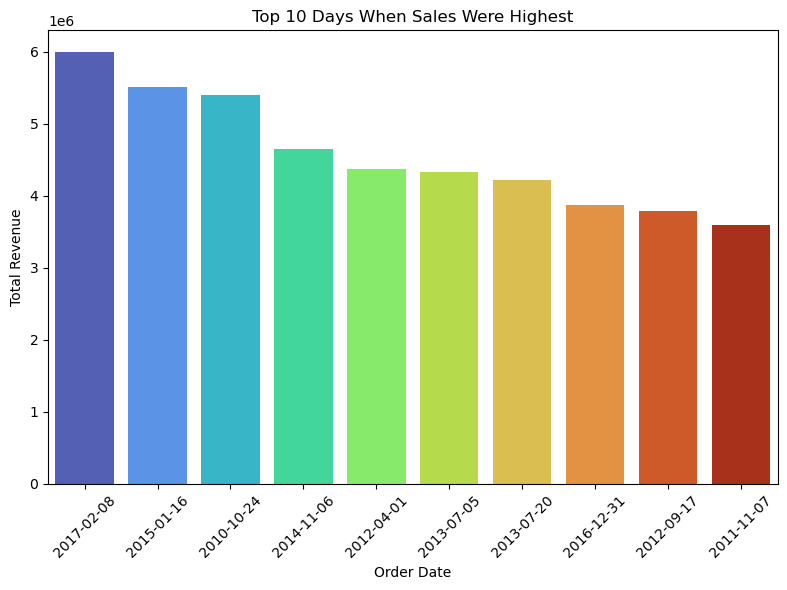

In [107]:
# Ensure 'Order Date' is in datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'])

# Aggregate total revenue by date
sales_by_date = df.groupby('Order Date')['Total Revenue'].sum().reset_index()

# Sort by total revenue in descending order and select top 10 days
top10sales = sales_by_date.sort_values(by='Total Revenue', ascending=False).head(10)

# Remove timestamp from 'Order Date' for visualization
top10sales['Order Date'] = top10sales['Order Date'].dt.date

# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x='Order Date', y='Total Revenue', data=top10sales, palette='turbo')

plt.title('Top 10 Days When Sales Were Highest')
plt.xlabel('Order Date')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()

plt.show()

- The bar chart shows the top **10** Days when sales were highest.
- We can also conclude that the highest sale was generated on **(Feb 8, 2017 i.e; 2017-02-08)**.

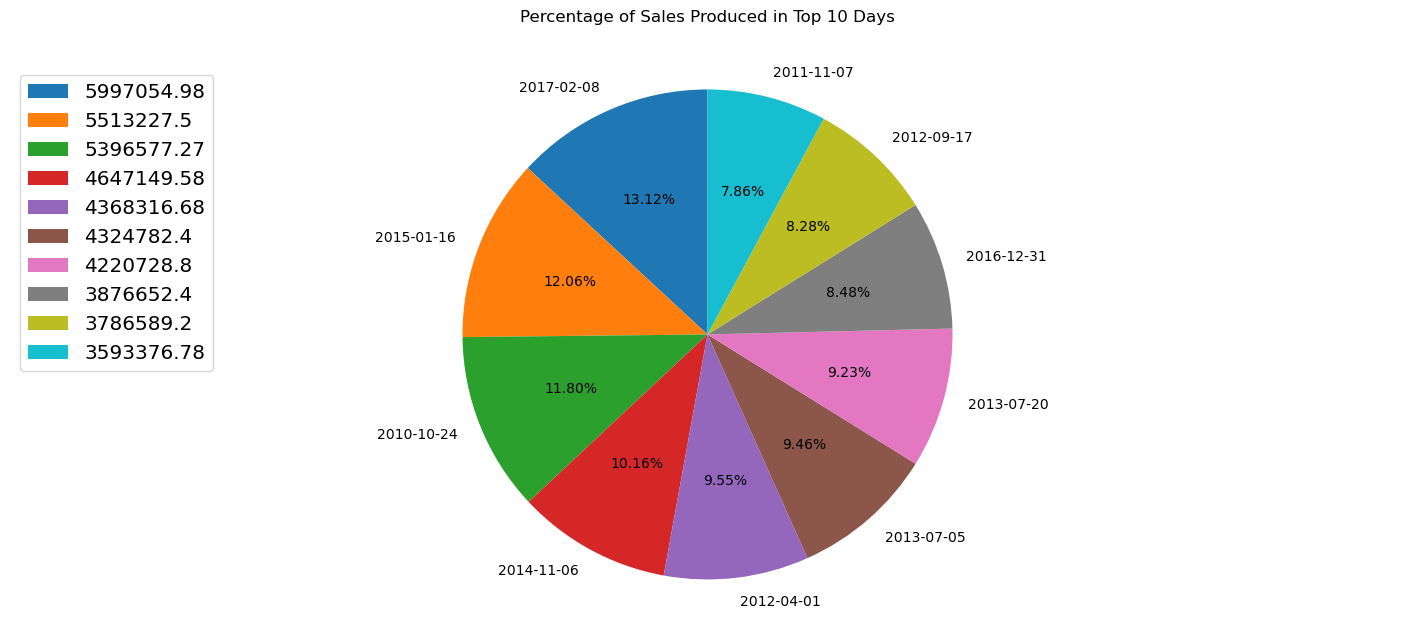

In [108]:
# Plotting the pie chart
plt.figure(figsize=(18, 7))
plt.pie(top10sales['Total Revenue'], 
        labels=top10sales['Order Date'],
        autopct='%1.2f%%',
        startangle=90)

plt.axis('equal') 
plt.title('Percentage of Sales Produced in Top 10 Days\n\n')
plt.legend(round(top10sales['Total Revenue'], 2), loc='upper left', fontsize='x-large')
plt.show()

- The above pie chart clearly demonstartes the contribution of sales in the top 10 Days, that is **13.12%** on 2017-02-08.

In [113]:
# Group the data by years and calculate the total revenue for each year
yearly_sales = df.groupby(df['Order Date'].dt.year)['Total Revenue'].sum()

# Reset index and rename columns for clarity
yearly_sales = yearly_sales.reset_index()
yearly_sales = yearly_sales.rename(columns={'Order Date': 'Year', 'Total Revenue': 'Total Sales'})

print(yearly_sales)

   Year  Total Sales
0  2010  19186024.92
1  2011  11129166.07
2  2012  31898644.52
3  2013  20330448.66
4  2014  16630214.43
5  2015  12427982.86
6  2016  12372867.22
7  2017  13373419.63


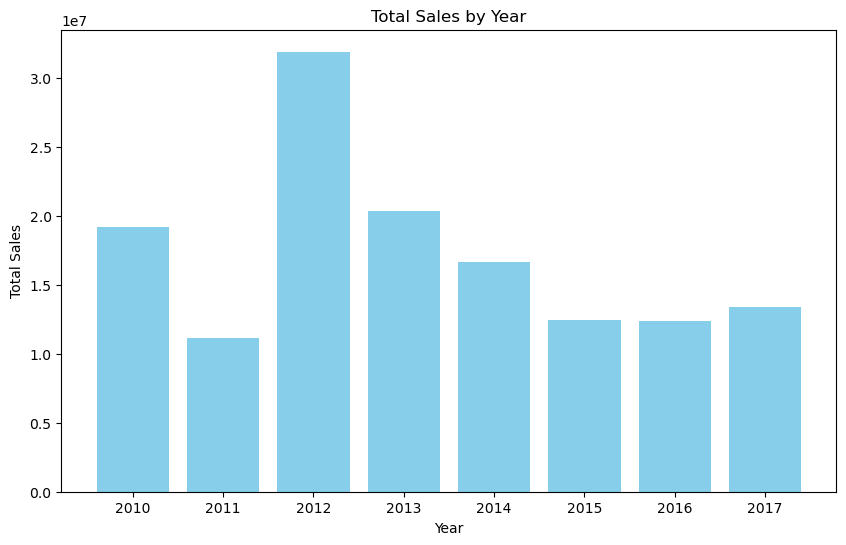

In [114]:
plt.figure(figsize=(10, 6))
plt.bar(yearly_sales['Year'], yearly_sales['Total Sales'], color='skyblue')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Total Sales by Year')
plt.show()

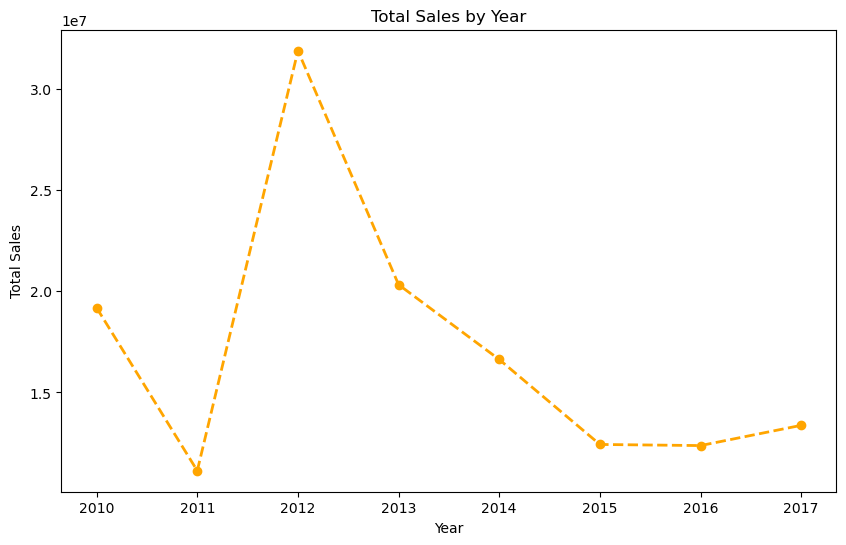

In [140]:
# Plotting the line chart
plt.figure(figsize=(10, 6))
plt.plot(yearly_sales['Year'], yearly_sales['Total Sales'], marker='o', color='orange', linestyle='--', linewidth=2)
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.title('Total Sales by Year')
plt.show()

- The bar chart and line chart shows that year **2012** recorded the most sales generated.

In [127]:
# Filter the data for the year 2012
year_sales = df[df['Year'] == 2012]

# Calculate the quarterly sales for 2012 by summing up 'Total Revenue'
quarterly_sales = year_sales.groupby('Quarter')['Total Revenue'].sum().reset_index()

# Rename columns for clarity
quarterly_sales = quarterly_sales.rename(columns={'Total Revenue': 'Total Sales'})

# Print the quarterly sales for 2012
print("Quarterly Sales for 2012:\n")
print(quarterly_sales)

Quarterly Sales for 2012:

  Quarter  Total Sales
0  2012Q1   8715498.84
1  2012Q2  10470869.47
2  2012Q3   9670029.44
3  2012Q4   3042246.77


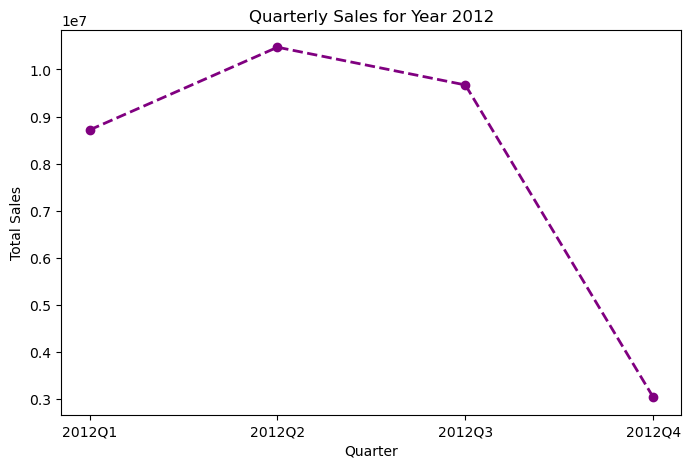

In [135]:
# Convert Quarter periods to strings
quarterly_sales['Quarter'] = quarterly_sales['Quarter'].astype(str)
plt.figure(figsize=(8, 5))
plt.plot(quarterly_sales['Quarter'], quarterly_sales['Total Sales'], marker='o', color='purple', linestyle='--', linewidth=2)
plt.xlabel('Quarter')
plt.ylabel('Total Sales')
plt.title('Quarterly Sales for Year 2012')
plt.show()

- The above line chart shows that in year **2012** the most sales were generated in the `2nd` Quarter, while the lowest sales where generated in `4th` Quarter.

In [138]:
import matplotlib.pyplot as plt

# Filter the data for the year 2012
year_sales = df[df['Year'] == 2012]

# Calculate the monthly sales for 2012 by summing up 'Total Revenue'
monthly_sales = year_sales.groupby('Month')['Total Revenue'].sum().reset_index()

# Rename columns for clarity
monthly_sales = monthly_sales.rename(columns={'Total Revenue': 'Total Sales'})
print("Monthly Sales for 2012:\n")
print(monthly_sales)

Monthly Sales for 2012:

   Month  Total Sales
0      1   1012884.00
1      2   6707849.42
2      3    994765.42
3      4   4556012.38
4      5   3782781.82
5      6   2132075.27
6      7   4445093.92
7      8    576782.80
8      9   4648152.72
9     10   3042246.77


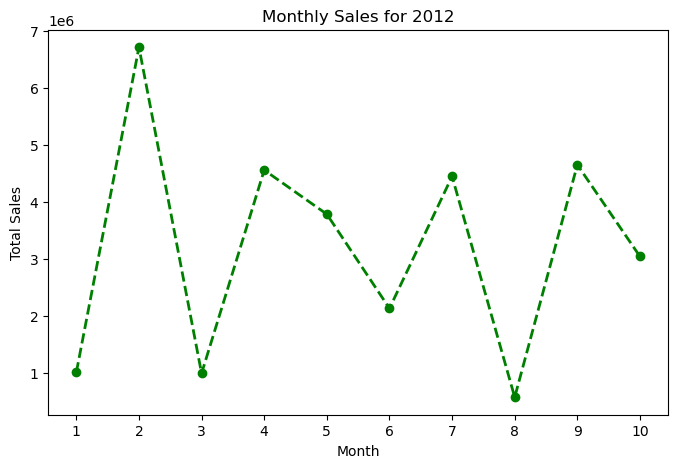

In [141]:
plt.figure(figsize=(8, 5))
plt.plot(monthly_sales['Month'], monthly_sales['Total Sales'], marker='o', color='green', linestyle='--', linewidth=2)
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales for 2012')
# Set x-axis labels to show month numbers clearly
plt.xticks(monthly_sales['Month'])
plt.show()

- The above line chart shows that mothly sales produced in year **2012**. 
- It can be seen that the most sales were generated in the `2nd` month of the year, while the lowest sales where generated in `8th` Month.

#### (v) Order Priority Analysis:

In [34]:
order_priority = df['Order Priority'].unique()
print(order_priority)

['H' 'C' 'L' 'M']


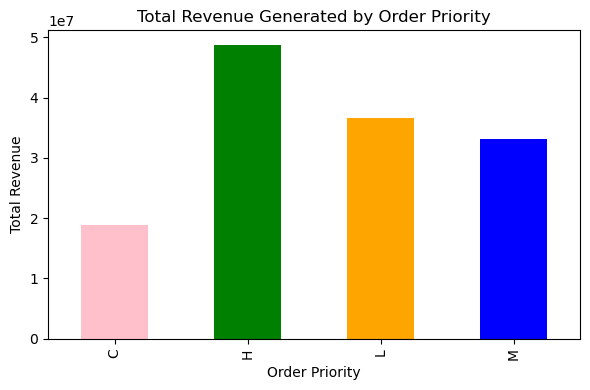

In [146]:
revenue_by_priority = df.groupby('Order Priority')['Total Revenue'].sum()
plt.figure(figsize=(6, 4))
revenue_by_priority.plot(kind='bar', color=['pink', 'green', 'orange', 'blue'])

plt.title('Total Revenue Generated by Order Priority')
plt.xlabel('Order Priority')
plt.ylabel('Total Revenue')
plt.tight_layout()
plt.show()

- From the above bar graph we can say that maximum profit has been generated by products having order priority `'H'` while minimum profit has been seen in case of `'C'` priority product orders.